In [1]:
# convert json to csv
import pandas as pd

df = pd.read_json (r'video-infos-biden_v1_b5_d7-Joe Biden-20200424.json')

In [2]:
# transpose DataFrame
# transpose column to rows
df_trans  = df.T

In [3]:
# drop index and create new index
df_unique = df_trans.reset_index(drop=True)

In [4]:
#expand keys into separate rows
#cannot use recommendations column since it is a list
#gives error unhashable type
names = ['pubdate', 'views', 'dislikes', 'likes', 'duration', 'id', 'mult', 'title', 'nb_recommendations', 'depth', 'channel']

df_long = (df_unique.
           set_index(names).
           key.apply(pd.Series).stack().
           reset_index(names, 
                       name='key')
          )

In [5]:
df_long.sort_values(by='key', inplace=True)

In [6]:
df_long.head(100)

,pubdate,views,dislikes,likes,duration,id,mult,title,nb_recommendations,depth,channel,key
0,2020-04-23,195782,1129,2499,448,f9AuFaqOgS0,0.042502,Biden Leads Trump In Two Key Battleground Stat...,2,7,MSNBC,1
0,2020-04-24,340788,397,5479,903,0WuwYdSdjlw,26.946202,Breaking Down Trump's Thursday Press Briefing ...,1268,1,MSNBC,1a
0,2020-04-24,805526,1791,13245,710,sqI5_jH-AbY,31.196392,Trump Suggests Disinfectant To Kill Virus Insi...,1468,1,MSNBC,1aa
1,2020-04-24,340788,397,5479,903,0WuwYdSdjlw,26.946202,Breaking Down Trump's Thursday Press Briefing ...,1268,1,MSNBC,1aaa
1,2020-04-24,805526,1791,13245,710,sqI5_jH-AbY,31.196392,Trump Suggests Disinfectant To Kill Virus Insi...,1468,1,MSNBC,1aaaa
...,...,...,...,...,...,...,...,...,...,...,...,...
0,2020-03-31,3400349,1214,71634,658,0vgOzy0Mfsw,7.374079,"John Oliver: How I'm Hosting ""Last Week Tonigh...",347,1,The Late Show with Stephen Colbert,1aaaced
0,2016-11-07,21974654,10802,246412,1918,s6MwGeOm8iI,8.712889,Multilevel Marketing: Last Week Tonight with J...,410,1,LastWeekTonight,1aaacee
2,2020-04-22,546505,463,6745,821,JBCicP17ZFY,17.404526,John Kerry: Coronavirus May Be America's 'Mome...,819,1,MSNBC,1aaad
0,2020-04-22,878499,641,8559,1025,fXD-yE2asCY,5.333988,Trump Hurting Himself With Key Groups Ahead Of...,251,1,MSNBC,1aaada


In [12]:
unique_ids = pd.DataFrame()
unique_ids = df_unique['id']
unique_ids.head()

0    LV8wWhjTKRU
1    oHLychWng4c
2    phsU1vVHOQI
3    2X1Tgmsv9Ao
4    MpV8kPJTNMU
Name: id, dtype: object

In [14]:
# export Data.Frame
df_unique.to_csv(r'./csv/biden_20200427_unique.csv', 
                      index = None, header=True)

In [13]:
# export Data.Frame
unique_ids.to_csv(r'./csv/biden_20200427_unique_ids.csv', 
                      index = None, header=True)

In [15]:
# export Data.Frame
df_long.to_csv(r'./csv/biden_20200427_all.csv', 
                      index = None, header=True)

In [7]:
#unique rows
len(df_unique)

1569

In [8]:
#number of rows in total dataset
len(df_long)

16578

In [59]:
#unique channels
unique_channels = df_trans_index.channel.unique()
len(unique_channels)

1188

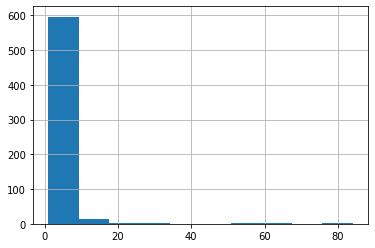

In [9]:
#histogram of channels
df_unique['channel'].value_counts().hist()

In [10]:
#list of # channels
df_unique['channel'].value_counts()

Fox News                                             84
MSNBC                                                61
                                                     55
LastWeekTonight                                      53
PowerfulJRE                                          33
                                                     ..
klowny1969                                            1
University of Kentucky College of Arts & Sciences     1
KVIEvideo                                             1
bCp - Poker Highlights                                1
tdkt160                                               1
Name: channel, Length: 619, dtype: int64

In [13]:
#number of channels with less than 10 appearances
channels = df_unique['channel'].value_counts()
channels.loc[channels < 11]

FloTrack                                             10
CBS News                                             10
World Archery                                        10
Vincent Racaniello                                    9
NBC News                                              9
                                                     ..
klowny1969                                            1
University of Kentucky College of Arts & Sciences     1
KVIEvideo                                             1
bCp - Poker Highlights                                1
tdkt160                                               1
Name: channel, Length: 599, dtype: int64

In [14]:
channels_pc = round(channels/ sum(channels) * 100, 2) 

In [15]:
channels_pc

Fox News                                             5.35
MSNBC                                                3.89
                                                     3.51
LastWeekTonight                                      3.38
PowerfulJRE                                          2.10
                                                     ... 
klowny1969                                           0.06
University of Kentucky College of Arts & Sciences    0.06
KVIEvideo                                            0.06
bCp - Poker Highlights                               0.06
tdkt160                                              0.06
Name: channel, Length: 619, dtype: float64

In [151]:
channels_pc.head(11).sum()

22.830000000000005

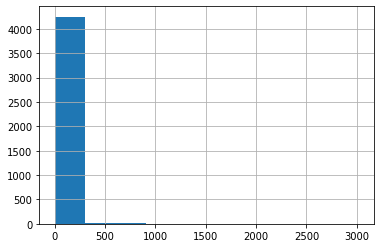

In [86]:
#histogram of title
df_long['title'].value_counts().hist()

In [16]:
#list of # titles
df_long['title'].value_counts()

                                                                                                      730
Mitch McConnell's "Screw The States" Plan Riles Lawmakers From Both Parties                           553
Trump Suggests Disinfectant To Kill Virus Inside The Body | Morning Joe | MSNBC                       392
Breaking Down Trump's Thursday Press Briefing | Morning Joe | MSNBC                                   359
Jimmy Kimmel’s Quarantine Monologue – Jimmy's Daughter Does His Makeup & Trump Contradicts Experts    335
                                                                                                     ... 
Thomas Sowell on the second edition of Intellectuals and Society                                        1
TWiV 602: Coronavirus immunology with Stanley Perlman                                                   1
Biden Leads Trump In Two Key Battleground States: Poll | Morning Joe | MSNBC                            1
How Dr. Anthony Fauci Became America's Doctor 

In [88]:
#max pulication date
max(df_long.pubdate)

'2020-04-23'

In [89]:
#min pulication date
min(df_long.pubdate)

''

In [97]:
#total views per channel
df_long.groupby(by='channel')['views'].sum().sort_values(ascending=False)

channel
NBC News                 47942601892
CBS News                 29245371834
Global News              28341396650
LastWeekTonight          22938953054
CBC News                 10200299105
                            ...     
YouTube Originals                 -1
Simon Sinek                       -1
USArmyWarCollege                  -2
euronews (in English)             -5
                               -2780
Name: views, Length: 1188, dtype: int64

In [102]:
#average views per channel
df_long.groupby(by='channel')['views'].median().sort_values(ascending=False)

channel
m2e1iriko               69758357.0
Steve TV Show           60618176.0
Good Morning America    51950042.0
Bodybuilding.com        49463928.0
Blaiyan                 44192198.0
                           ...    
Roland S. Martin              -1.0
Simon Sinek                   -1.0
TIME                          -1.0
Al Jazeera English            -1.0
                              -1.0
Name: views, Length: 1188, dtype: float64

In [110]:
#average number of views
df_long['views'].median()

590644.0

In [105]:
df_long['pubdate'].value_counts()

2020-04-23    24985
2020-04-22     9135
2016-10-09     4853
2016-10-19     3658
               2780
              ...  
2017-02-04        1
2017-09-13        1
2016-10-28        1
2013-11-02        1
2019-08-09        1
Name: pubdate, Length: 1784, dtype: int64

In [157]:
!ls

video-infos-20200315_Joe_Biden-Joe Biden-20200315.csv
video-infos-20200319_Joe_Biden-Joe Biden-20200319.csv


In [156]:
%cd _old

/Users/Rolf/Documents/GitHub/esade_fake_news/4_Politics/youtube_recommendation_scrapper/data/csv/_old


In [158]:
d = pd.read_csv("video-infos-20200315_Joe_Biden-Joe Biden-20200315.csv")

In [161]:
d1 = d["id"]

In [163]:
d1.to_csv(r'unique_id.csv', 
                      index = None, header=True)